Jesus David Serpa Pajaro

25 Septiembre 2025




## Primera aproximación a los datos de forma general y su limpieza:


In [142]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('penguins')

In [143]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [145]:
df.groupby(['species']).count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


A partir de esto podemos decir las tres especies de los pinguinos en este dataset (Adelie, Chinstrap, Gentoo), ademas de otras caracteristicas como la longitud del pico, la profundidad del pico, la longitud de la aleta, la masa corporal y el sexo.

2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [146]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


Podemos apreciar que en el dataset si tiene valores nulos, y para este estudio lo rellenamos los valores numericos nulos con la media de este

In [147]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


rellenamos los valores nulos del sexo y escogiendo aleatoriamente entre Male y Female

In [148]:
rng = np.random.default_rng(42)
mask = df["sex"].isna()
df.loc[mask, "sex"] = rng.choice(["Male","Female"], size=mask.sum())

In [149]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Female
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


In [150]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


Comprobamos que ya no tiene valores nulos.

3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

In [151]:
df['island'].value_counts()

,count
island,
Biscoe,168
Dream,124
Torgersen,52


La isla con mayor numero de pinguinos es Biscoe, y si hay un desbalance porque la cantidad de Biscoe es mas de tres veces que Torgesen, es cual tambien es menos de la mitad que Dream

4. Repita la pregunta anterior observando las especies.

In [152]:
df['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


En este caso el mayor numero de pinguions por especie es adelie , moestrando que es mas del doble que chinstrap y es la mitad de gentoo.

## Tendencias y visualizacion de las variables


5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [153]:
df.groupby('species')['bill_length_mm'].agg(log_media="mean", desv_est="std")

,log_media,desv_est
species,,
Adelie,38.825144,2.686991
Chinstrap,48.833824,3.339256
Gentoo,47.475983,3.086123


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [154]:
df[df['bill_length_mm'] == df['bill_length_mm'].max()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard

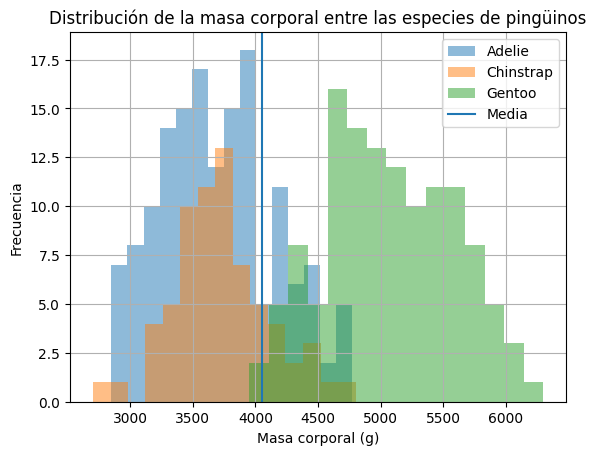

In [155]:
for sp, g in df.groupby("species"):
    plt.hist(g["body_mass_g"], bins=15, alpha=0.5, label=sp)
plt.xlabel("Masa corporal (g)"); plt.ylabel("Frecuencia")
plt.axvline(df["body_mass_g"].median(), label = 'Media')
plt.title("Distribución de la masa corporal entre las especies de pingüinos")
plt.legend()
plt.grid()
plt.show()

In [156]:
df.groupby('species')['body_mass_g'].agg(log_media="mean", desv_est="std")

,log_media,desv_est
species,,
Adelie,3703.958910,458.848798
Chinstrap,3733.088235,384.335081
Gentoo,5068.965761,508.164382


A partir de la imagen podemos ver que la distribucion de masas se inclina a que la especie Gentoo tiene una masa corporal mucho mayor que la de Adelie y Chinstrap, las cuales tienen una masa similar. y tambien concluimos que la especie Gentoo es la que tiene una variación mayor, y le sigue Adelie y por ultimo Chinstrap.

9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [157]:
dff = df.groupby('sex')['body_mass_g'].agg(log_media="mean", desv_est="std")
dff

,log_media,desv_est
sex,,
Female,3863.686791,664.411295
Male,4532.050313,783.839995


In [158]:
dff.loc["diff_M_F"] = dff.loc["Male"] - dff.loc["Female"]
dff

,log_media,desv_est
sex,,
Female,3863.686791,664.411295
Male,4532.050313,783.839995
diff_M_F,668.363522,119.428700


10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?


In [159]:
df.groupby('species')['flipper_length_mm'].agg(log_media="mean", desv_est="std")

,log_media,desv_est
species,,
Adelie,190.025758,6.578130
Chinstrap,195.823529,7.131894
Gentoo,217.055768,6.621801


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?




In [160]:
df.groupby('species')['flipper_length_mm'].agg(min = 'min', max = 'max')

,min,max
species,,
Adelie,172.000000,210.0
Chinstrap,178.000000,212.0
Gentoo,200.915205,231.0


12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?



In [161]:
df.groupby(["island","species"])["bill_length_mm"].agg(n="count", media="mean", sd="std")



n      media        sd
island    species                            
Biscoe    Adelie      44  38.975000  2.480916
          Gentoo     124  47.475983  3.086123
Dream     Adelie      56  38.501786  2.465359
          Chinstrap   68  48.833824  3.339256
Torgersen Adelie      52  39.046576  3.073806

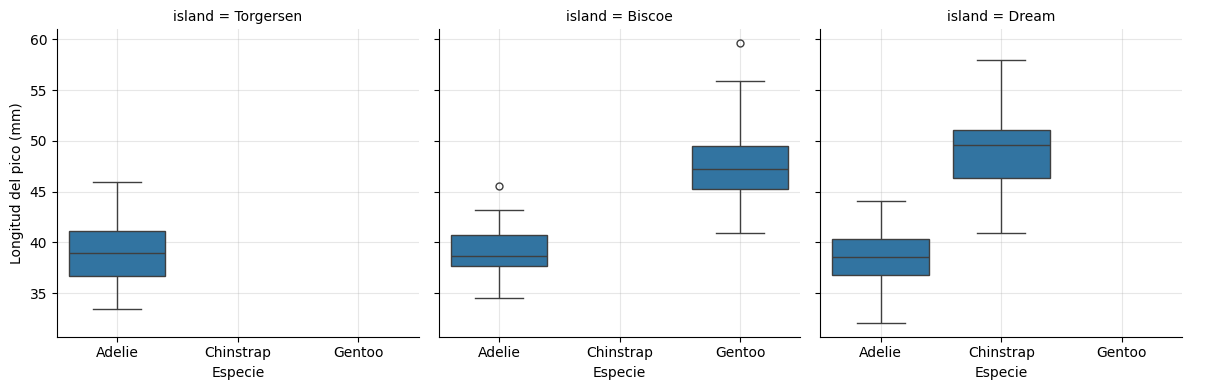

In [162]:
g = sns.catplot(
    data=df,
    x="species", y="bill_length_mm",
    col="island", kind="box",
    height=4, aspect=1
)
g.set_axis_labels("Especie", "Longitud del pico (mm)")
for ax in g.axes.flat: ax.grid(True, alpha=0.3)
plt.show()

Gracias a la grafica, podemos ver como varia la longitud del pico por especie dependiendo de la isla en la que se encuentra, y se puede apreciar que los que tiene el la media mas alta son los Chistrap en la isla Dream teniendo este la variacion mayor y  le sigue Gentoo en la isla de Biscoe con la longitud media mayor.

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

## Relación entre caracteristicas de los pingüinos





14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.


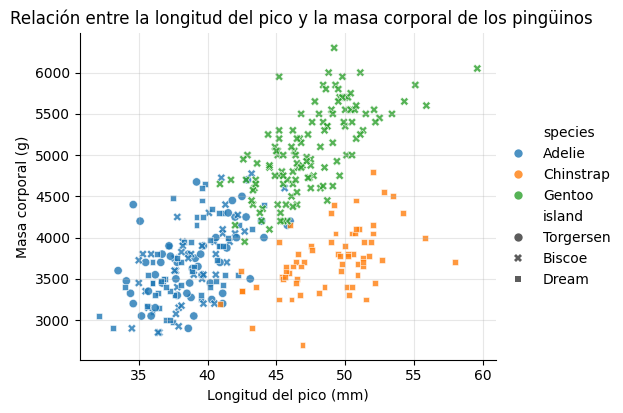

In [163]:
g = sns.relplot(
    data=df,
    x="bill_length_mm", y="body_mass_g",
    hue="species", style="island",
    kind="scatter", height=4, aspect=1.3, alpha=0.8
)

g.set_axis_labels("Longitud del pico (mm)", "Masa corporal (g)")
g.fig.suptitle("Relación entre la longitud del pico y la masa corporal de los pingüinos", y=1.02)
for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)

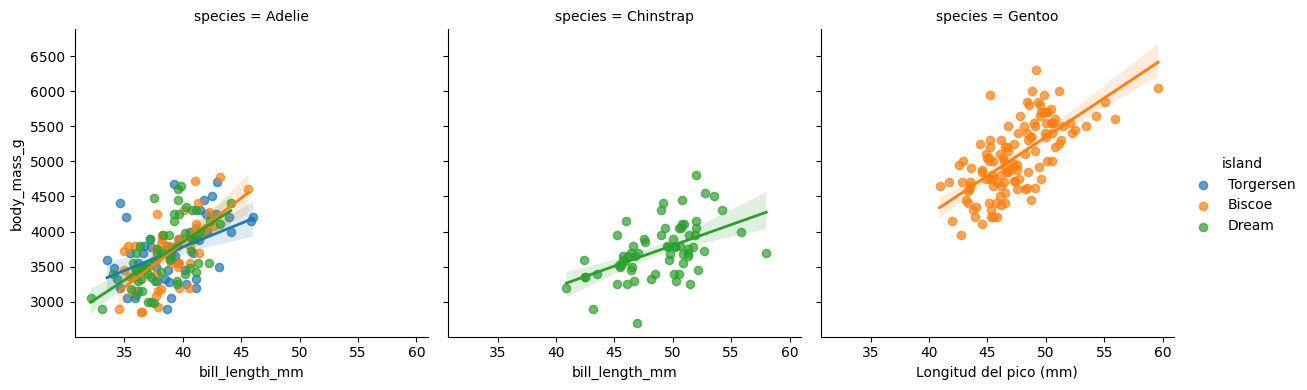

In [164]:
sns.lmplot(
    data=df,
    x="bill_length_mm", y="body_mass_g",
    col="species", hue="island",
    height=4, aspect=1,
    scatter_kws={"alpha":0.7, "s":35},
    line_kws={"linewidth":2},
    ci=95
)
plt.xlabel("Longitud del pico (mm)"); plt.ylabel("Masa corporal (g)")
plt.show()


15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?


In [165]:
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


/tmp/ipython-input-1841242051.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g["bill_length_mm"].corr(g["body_mass_g"])))


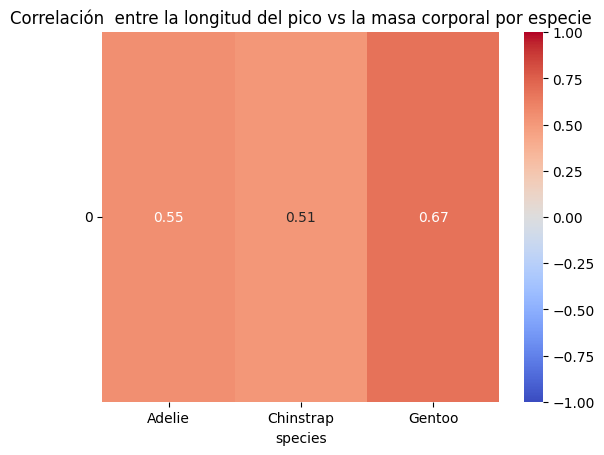

In [166]:
r = (df.groupby("species")
       .apply(lambda g: g["bill_length_mm"].corr(g["body_mass_g"])))

sns.heatmap(r.to_frame().T, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlación  entre la longitud del pico vs la masa corporal por especie")
plt.yticks(rotation=0)
plt.show()

A partir de esto si se puede apreciar la relacion que tiene la longitud del pico con la masa corporal en las diferentes especies de pingüinos.

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

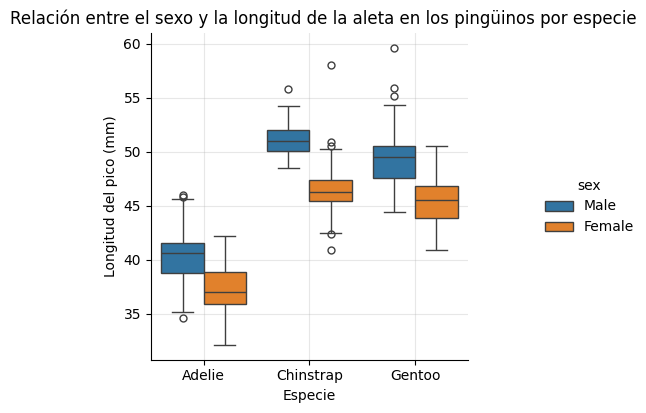

In [167]:
g = sns.catplot(
    data=df,
    x="species", y="bill_length_mm",
    hue="sex", kind="box",
    height=4, aspect=1
)
g.set_axis_labels("Especie", "Longitud del pico (mm)")
g.fig.suptitle("Relación entre el sexo y la longitud de la aleta en los pingüinos por especie", y=1.02)
g.ax.grid(True, alpha=0.3)

plt.show()

A partir de la grafica de cajas, podemos ver que en general para cualquier especie la longitud del pico tiende a ser mayor para el los pinguinos machos que las hembras.

## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.






* **Hipotesis nula** $H_o$  = Hay una relacion aleatoria entre longitud del pico y la masa corporal
* **Hipotesis alternativa** $H_o$ = Hay una correlacion

Permutación: r_obs=0.595, p≈0.0000


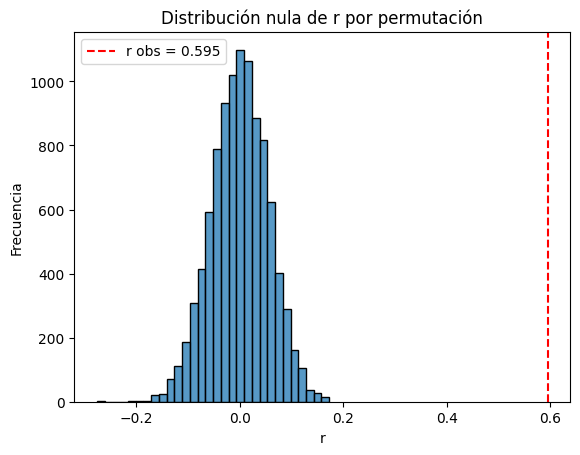

In [168]:
x = df["bill_length_mm"].to_numpy()
y = df["body_mass_g"].to_numpy()

# r observado
def corr(x, y): return np.corrcoef(x, y)[0,1]
r_obs = corr(x, y)

# Permutación
rng = np.random.default_rng(42)
n_rep = 10000
r_perm = np.empty(n_rep)
for i in range(n_rep):
    y_shuf = rng.permutation(y)
    r_perm[i] = corr(x, y_shuf)

# p-valor (bilateral)
p_perm = (np.abs(r_perm) >= abs(r_obs)).mean()
print(f"Permutación: r_obs={r_obs:.3f}, p≈{p_perm:.4f}")

# Visual
sns.histplot(r_perm, bins=30)
plt.axvline(r_obs, color="red", linestyle="--", label=f"r obs = {r_obs:.3f}")
plt.title("Distribución nula de r por permutación")
plt.xlabel("r"); plt.ylabel("Frecuencia"); plt.legend(); plt.show()


A partir de esto se niega la hipotesis nula, al confirmar que no es aletorio el comportamiento.